In [198]:
import pandas as pd 
import numpy as np 
import glob

import psycopg2
import sys
from datetime import datetime
import pandas.io.sql as psql

from db_parse import * 
from load_post import *
from pg import *

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
%matplotlib inline
from scipy.stats import binom
from scipy.stats import norm

In [2]:
sum_parse().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103405 entries, 0 to 103404
Data columns (total 28 columns):
district_num               103405 non-null int64
formatted_api_num          103405 non-null object
operator_name              103405 non-null object
operator_code              103405 non-null object
field_name                 103405 non-null object
field_code                 103405 non-null int64
api_num                    103405 non-null int64
lease_name                 69868 non-null object
well_num                   103404 non-null object
well_status                103405 non-null object
pool_welltypes             103405 non-null object
section                    103405 non-null int64
township                   103405 non-null object
range                      103405 non-null object
base_meridian              103405 non-null object
area_code                  103405 non-null int64
area_name                  103405 non-null object
latitude                   103405 non-null fl

In [116]:
parse_excel('/Users/taylorphillips/Downloads/*.xlsx').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139961 entries, 1 to 535
Data columns (total 17 columns):
api_number             1139961 non-null int64
production_date        1139961 non-null object
oil_produced_bbl       1097397 non-null float64
water_produced_bbl     1095656 non-null float64
gas_produced_mcf       1054418 non-null float64
days_well_produced     1098631 non-null float64
gravity_of_oil         1078425 non-null float64
casing_pressure        797479 non-null float64
tubing_pressure        808149 non-null float64
btu                    473576 non-null float64
method_of_operation    1001660 non-null object
water_disposition      1004917 non-null float64
pwt_status             1139961 non-null object
well_type              1139961 non-null object
status                 1032462 non-null float64
pool_code              1139961 non-null float64
reported_date          1139961 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(4)
memory usage: 156

In [117]:
run load_post.py

<Figure size 432x288 with 0 Axes>

In [118]:
pg_load_table('/Users/taylorphillips/galvanize/capstone/summary.csv', 'summary', 'welldata', 'localhost', 'taylorphillips')
pg_load_table('/Users/taylorphillips/galvanize/capstone/production.csv', 'production', 'welldata', 'localhost', 'taylorphillips')

Connecting to Database
Truncated summary
Loaded data into summary
DB connection closed.
Connecting to Database
Truncated production
Loaded data into production
DB connection closed.


In [119]:
run pg.py

In [120]:
df.sum()

operator_name    California Resources Elk Hills, LLCChevron U.S...
well_count                                                    2352
idle_count                                                    1222
idle_rate                                                  27.6218
dtype: object

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 4 columns):
operator_name    73 non-null object
well_count       73 non-null int64
idle_count       73 non-null float64
idle_rate        73 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.9+ KB


In [122]:
df10.sum()

operator_name    California Resources Elk Hills, LLCChevron U.S...
well_count                                                    2371
idle_count                                                     711
idle_rate                                                  15.7073
dtype: object

In [25]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 4 columns):
operator_name    75 non-null object
well_count       75 non-null int64
idle_count       75 non-null float64
idle_rate        75 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.9+ KB


In [40]:
samp_n = 2352
samp_x = 1222
samp_p = 1222/2352

In [41]:
samp10_n = 2371
samp10_x = 711
samp10_p = 711/2371

In [114]:
df.head(15)

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",534,446.0,0.835206
1,Chevron U.S.A. Inc.,443,170.0,0.383747
2,California Resources Production Corporation,224,129.0,0.575893
3,Crimson Resource Management Corp.,142,82.0,0.577465
4,"Vaquero Energy, Inc.",101,35.0,0.346535
5,Bellaire Oil Company,99,35.0,0.353535
6,E & B Natural Resources Management Corporation,93,49.0,0.526882
7,"Sequoia Exploration, Inc.",75,16.0,0.213333
8,"Longbow, LLC",49,7.0,0.142857
9,"Emjayco, L. P.",40,0.0,0.000000


In [115]:
df10.head(15)

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",535,280.0,0.523364
1,Chevron U.S.A. Inc.,446,105.0,0.235426
2,California Resources Production Corporation,225,69.0,0.306667
3,Crimson Resource Management Corp.,142,65.0,0.457746
4,"Vaquero Energy, Inc.",101,21.0,0.207921
5,Bellaire Oil Company,99,18.0,0.181818
6,E & B Natural Resources Management Corporation,93,20.0,0.215054
7,"Sequoia Exploration, Inc.",75,0.0,0.000000
8,"Longbow, LLC",50,2.0,0.040000
9,"Emjayco, L. P.",40,0.0,0.000000


In [30]:
df.sort_values(by='idle_count', ascending=False).head(10)

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",534,446.0,0.835206
1,Chevron U.S.A. Inc.,443,170.0,0.383747
2,California Resources Production Corporation,224,129.0,0.575893
3,Crimson Resource Management Corp.,142,82.0,0.577465
6,E & B Natural Resources Management Corporation,93,49.0,0.526882
4,"Vaquero Energy, Inc.",101,35.0,0.346535
5,Bellaire Oil Company,99,35.0,0.353535
12,"Berry Petroleum Company, LLC",31,24.0,0.774194
13,Holmes Western Oil Corporation,26,22.0,0.846154
20,Alon Bakersfield Property Inc.,21,20.0,0.952381


In [108]:
df10.sort_values(by='idle_count', ascending=False).head(10)

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",535,280.0,0.523364
1,Chevron U.S.A. Inc.,446,105.0,0.235426
2,California Resources Production Corporation,225,69.0,0.306667
3,Crimson Resource Management Corp.,142,65.0,0.457746
4,"Vaquero Energy, Inc.",101,21.0,0.207921
11,"Berry Petroleum Company, LLC",32,20.0,0.625000
6,E & B Natural Resources Management Corporation,93,20.0,0.215054
5,Bellaire Oil Company,99,18.0,0.181818
17,"Citadel Exploration, Inc.",22,13.0,0.590909
15,Foothill Energy LLC,24,12.0,0.500000


In [32]:
x = df['well_count']
y = df['idle_rate']
z = df['idle_count']
x2 = df10['well_count']
y2 = df10['idle_rate']
z2 = df10['idle_count']

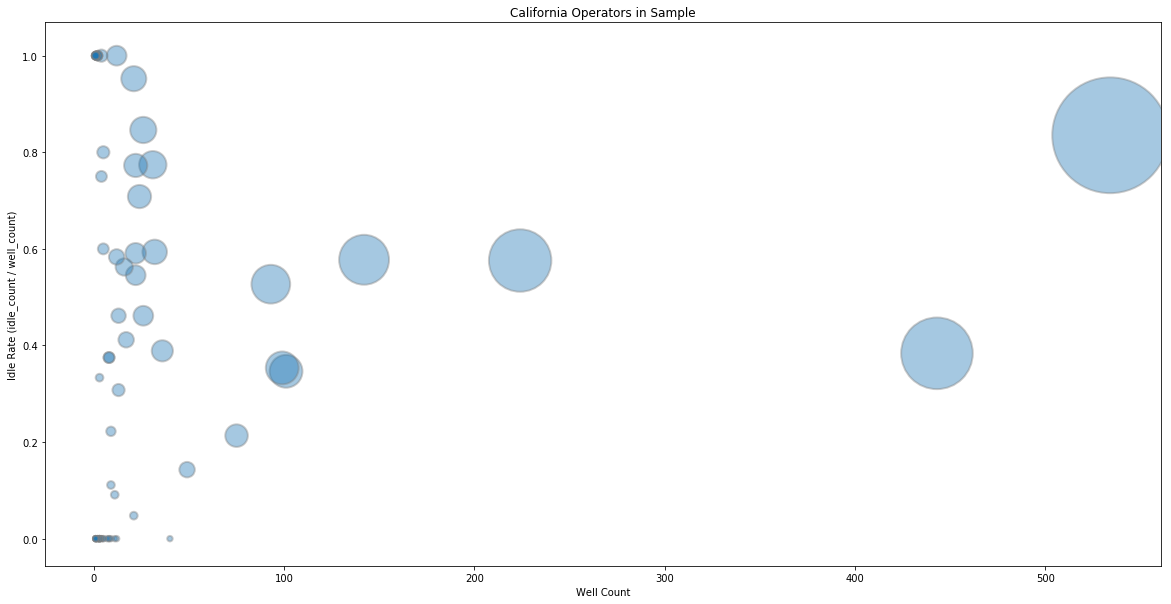

In [113]:
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=(z+1)*30, alpha=.4, edgecolors="grey", linewidth=2)
plt.xlabel("Well Count")
plt.ylabel("Idle Rate (idle_count / well_count)")
plt.title('California Operators in Sample')
plt.show()


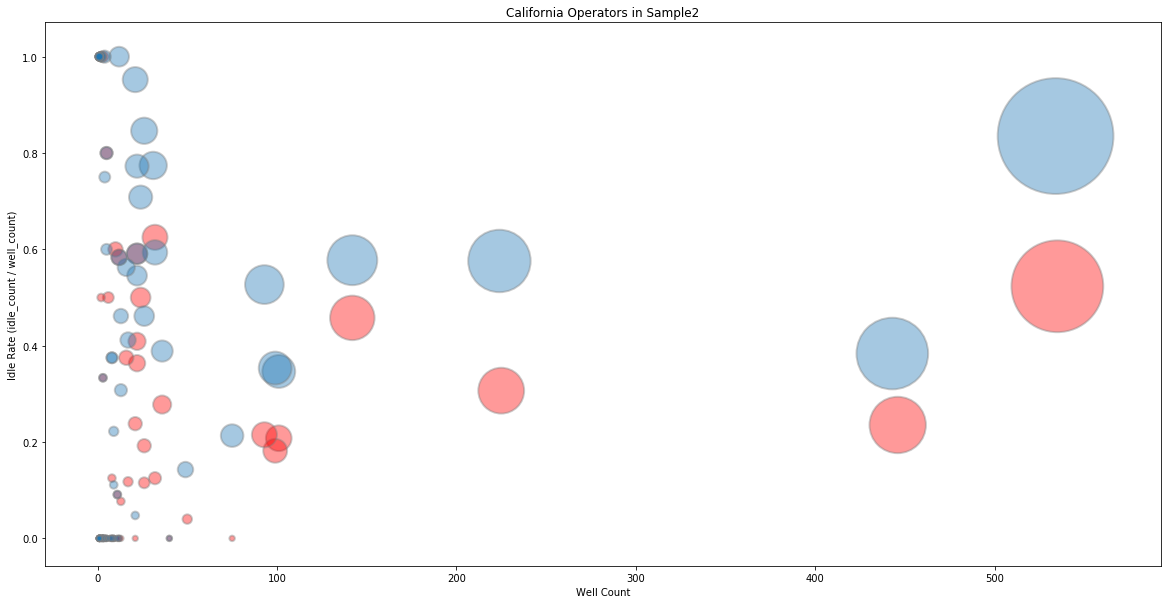

In [112]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x2, y2, s=(z2+1)*30, c='red', alpha=.4, edgecolors="grey", linewidth=2)
ax.scatter(x, y, s=(z+1)*30, alpha=.4, edgecolors="grey", linewidth=2)
plt.xlabel("Well Count")
plt.ylabel("Idle Rate (idle_count / well_count)")
plt.title('California Operators in Sample2')
plt.show()

In [35]:
samp_var = samp_n * samp_p * (1 - samp_p

587.1003401360545

In [199]:
samp_std = samp_var ** .5

In [192]:
samp10_var = samp10_n * samp10_p * (1 - samp10_p)


497.7899620413328

In [200]:
samp10_std = samp10_var ** .5

In [69]:
n = 103405

In [70]:
p = 30000 / 103405

In [190]:
print('EV: ', n*samp_p)
print('EV10year: ', n*samp10_p)

EV:  53724.876700680274
EV10year:  31008.416280050613


In [237]:
stats.binom_test(samp_x, n=samp_n, p=p, alternative='greater')

5.936668988722371e-120

In [238]:
stats.binom_test(samp10_x, n=samp10_n, p=p, alternative='greater')

0.15301161169114375

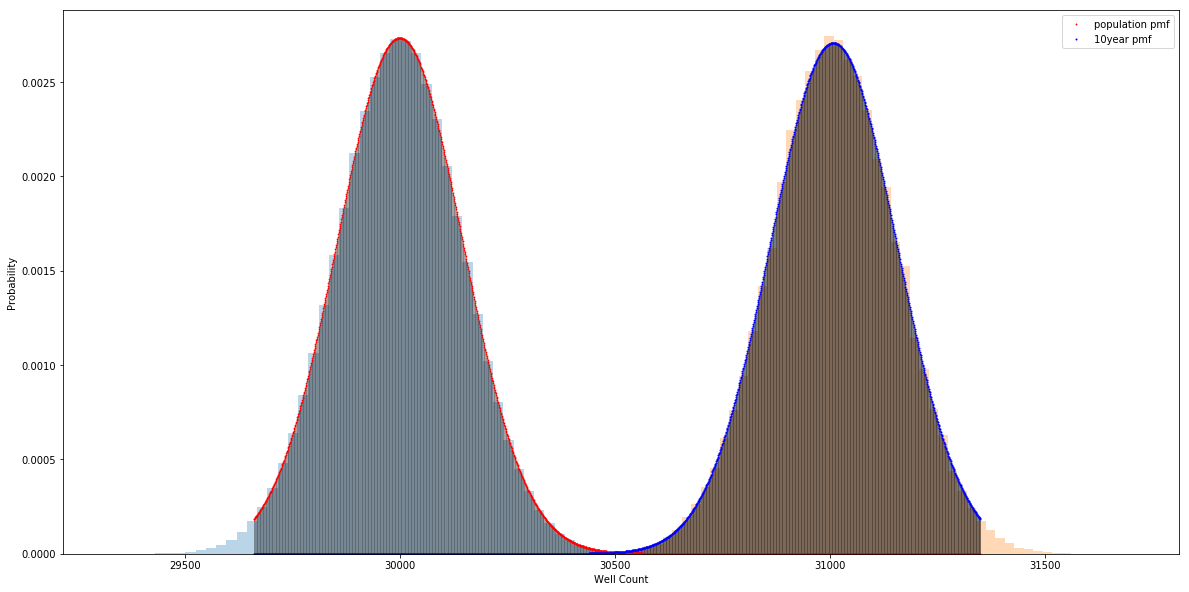

In [318]:
fig, ax = plt.subplots(figsize=(20,10))

xi = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, samp10_p))
ax.plot(xi, binom.pmf(xi, n, p), 'rd', ms=1, label='population pmf')
ax.plot(xi, binom.pmf(xi, n, samp10_p), 'bo', ms=1, label='10year pmf')
ax.vlines(xi, 0, binom.pmf(xi, n, p), lw=1, alpha=.2)
ax.vlines(xi, 0, binom.pmf(xi, n, samp10_p), lw=1, alpha=0.3)
#plt.axvline(x=286.02813261185224+30000)
ax.hist(y, density=True, bins=60, alpha=.3)
ax.hist(r, density=True, bins=60, alpha=.3)
plt.xlabel("Well Count")
plt.ylabel("Probability")
ax.legend()
plt.show()

In [315]:
xi

array([29661., 29662., 29663., ..., 31348., 31349., 31350.])

In [280]:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [281]:
print(mean, var, skew, kurt)

30000.0 21296.358976838645 0.0028763752436782434 -1.1067889953469049e-05


In [298]:
(21296.358976838645 ** .5)

145.93272072033278

In [282]:
mean, var, skew, kurt = binom.stats(samp_n, samp_p, moments='mvsk')

In [283]:
print(mean, var, skew, kurt)

1222.0 587.1003401360545 -0.0016143375323004663 -0.0008477340503862277


In [295]:
binom.pmf(30000, n, p, loc=0)

0.002733732632687239

In [267]:
r = stats.binom.rvs(n,samp10_p,size=103450)

In [299]:
y = norm.rvs(loc=30000, scale = 145.93272072033278, size=1000000)

In [300]:
y

array([29594.17062501, 30139.92320584, 29868.51302562, ...,
       29960.20039087, 30479.11738575, 29737.53903658])

In [316]:
r

array([30682, 30832, 31137, ..., 30979, 30950, 31377])